# Tutorial 1: Colors in maps

## Introduction
This tutorial focuses on creating static maps using network data from Open Street Map (OSM) with an emphasis on the effective choice of colors. The goal is to get familiarized with some of the Python tools for geographic data manipulation and visualization and practice color choice in maps.

### Libraries
In this section, we import a set of Python libraries essential for handling geographic data and visualizations:

- **networkx**: A Python library used for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. [networkx Documentation](https://networkx.org/documentation/stable/)
- **osmnx**: A package that simplifies the process of downloading and visualizing street networks from OpenStreetMap. [osmnx Documentation](https://osmnx.readthedocs.io/en/stable/)
- **requests**: A simple HTTP library for Python, allowing you to send HTTP requests easily. [requests Documentation](https://docs.python-requests.org/en/master/)
- **matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python. `cm` and `colors` are submodules used for managing color maps and color operations. [matplotlib Documentation](https://matplotlib.org/)
- **PIL (Pillow)**: The Python Imaging Library adds image processing capabilities to your Python interpreter. [Pillow Documentation](https://pillow.readthedocs.io/en/stable/)

These libraries collectively provide the functionality needed to retrieve geographic data, manipulate it, and produce informative visualizations.

In [1]:
import pathlib
import os
# To make maps
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D


# To add text and a border to the map
from PIL import Image, ImageOps, ImageColor, ImageFont, ImageDraw 

In [2]:
# set the paths
NOTEBOOK_PATH = pathlib.Path().resolve()
# We will export the final map here,
# let’s also prepare an output directory for it:
MAP_DIRECTORY = NOTEBOOK_PATH / "MyMap"
MAP_DIRECTORY.mkdir(exist_ok=True)

### Retrieving Geographic Data
Here we define our area of interest and uses `osmnx` to retrieve the corresponding street network from OpenStreetMap. The area specified is "Kamppi, Helsinki, Finland", focusing on all types of streets and simplifying the network for easier processing and visualization.

In [3]:
# Define the area
places = ["Kamppi, Helsinki, Finland"]

# Get data for the area
G = ox.graph_from_place(places, network_type = "all", simplify = True)

Let's take a quick look at our data using Geopandas library and then make a quick plot to see what we have. 

In [4]:
import geopandas as gpd
# Convert the Graph data to a geodataframe
nodes, edges = ox.graph_to_gdfs(G)
edges.head()

osmid  oneway lanes            name   highway  \
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary   
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed reversed  length  \
u        v          key                             
25216594 1372425721 0         40    False  10.404   
         1372425714 0         40    False  40.885   
25238874 336192701  0         40    False   5.843   
         1519889266 0         30    False  10.879   
25238883 568147264  0         40    False  15.388   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        junction width tunnel access bridge service  
u        v          key                                              
25216594 1372425721 0        NaN   NaN    NaN    NaN    NaN     NaN  
         1372425714 0        NaN   NaN    NaN    NaN    NaN     NaN  
25238874 336192701  0        NaN   NaN    NaN    NaN    NaN     NaN  
         1519889266 0        NaN   NaN    NaN    NaN    NaN     NaN  
25238883 568147264  0        NaN   NaN    NaN    NaN    NaN     NaN

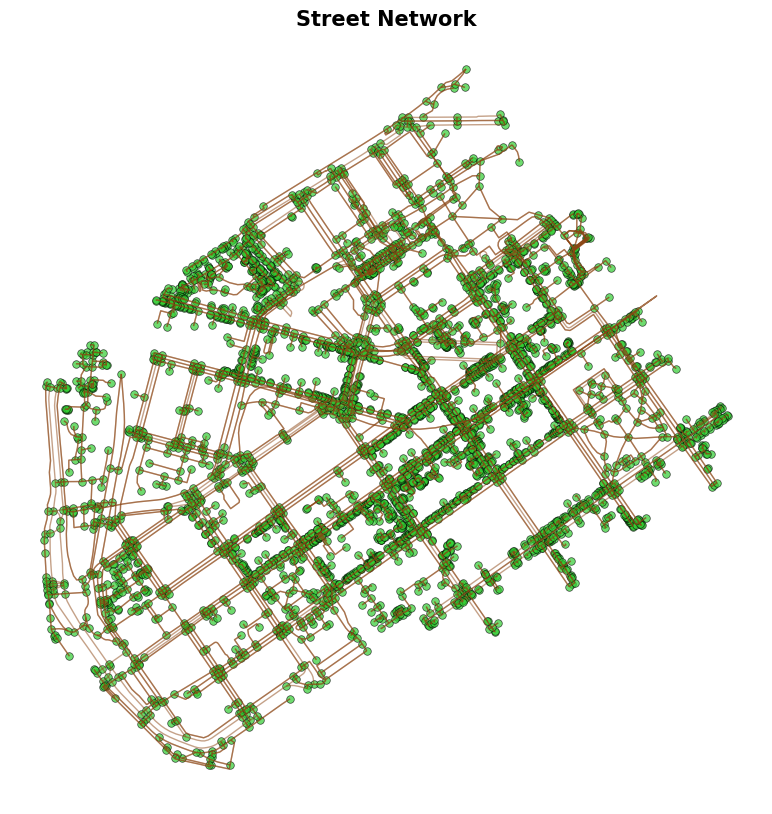

In [5]:
# Plot the 
import matplotlib.pyplot as plt

# Set the size of the plot
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

# Plot the edges with customized settings
edges.plot(ax=ax, color="saddlebrown", linewidth=1, alpha=0.5)

# Plot the nodes with customized settings
nodes.plot(ax=ax, color="limegreen", markersize=30, marker="o", edgecolor="black", linewidth=0.5, alpha=0.7)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Set a title for the plot (optional)
ax.set_title("Street Network", fontsize=15, fontweight='bold')


plt.show()

In [6]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata) 

## Working with colors
This cell defines our area of interest and uses `osmnx` to retrieve the corresponding street network from OpenStreetMap. The area specified is "Kamppi, Helsinki, Finland", focusing on all types of streets and simplifying the network for easier processing and visualization.

In [7]:
# Display interactive widgets
from color_palette_visualizer import run_visualizer
run_visualizer()

Output()

In [8]:
# List to store colors
roadColors = []

# The length is in meters
for item in data:
    if "length" in item.keys():
        
        if item["length"] <= 100:
            color = "#d40a47"
            
        elif item["length"] > 100 and item["length"] <= 200:
            color = "#e78119"
            
        elif item["length"] > 200 and item["length"] <= 400:
            color = "#30bab0"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#bbbbbb"
            
        else:
            color = "w"
             
    roadColors.append(color)

In [9]:
# List to store linewidths
roadWidths = []

for item in data:
    if "footway" in item["highway"]:
        linewidth = 1

    else:
        linewidth = 2.5
        
    roadWidths.append(linewidth)

In [10]:
# Extract node coordinates from the graph
nodes, edges = ox.graph_to_gdfs(G)
west, south, east, north = (
    nodes['x'].min(),
    nodes['y'].min(),
    nodes['x'].max(),
    nodes['y'].max()
)
margin = 0.001
#edges.head()

## Making maps
Let's make some maps now!

### Visualizing the Data with some customizations

We contniue working with `osmnx`, to visualize our street networks retrieved from OpenStreetMap. We will create a detailed and customized visualization of the graph `G`. We will also add a legend, a north arrow, and customized aesthetics for the map to improve our visualization.

### Generating the Map

We will make our map here with some specific characteristics as outlined below. Feel free to make experiments and change these characterestics to make an even better map. 

- `figsize=(40, 40)`: Sets the figure size to 40x40 inches, creating a large canvas for our map. This is beneficial for detailed or large-scale areas or for creating a high quality image for printing.
- `bgcolor="#061529"`: Specifies the background color of the figure, chosen here as a dark navy blue for aesthetic reasons and to make other colors stand out.
- `node_color='w'`, `node_size=0`: Nodes are colored white (`'w'`), but their size is set to `0` to effectively hide them, focusing the visualization on the edges or roads.
- `node_edgecolor='none'`, `node_zorder=1`: Node edges are not drawn, and their order (zorder) is set to ensure they appear behind the edges if they were visible.
- `edge_color`, `edge_linewidth`, `edge_alpha`: Edge colors and linewidths are dynamically set based on `roadColors` and `roadWidths`. `edge_alpha` is left as `None`, for full opacity.
- `show=False`, `close=False`, `save=False`: Controls for displaying, closing the plot window, and saving the figure are all set to `False` as this script handles saving manually.
- `dpi=300`: Sets the dots per inch (resolution) of the figure, ensuring high-quality output suitable for various uses, from web display to print.
- `bbox`: Custom bounding box defined by geographical coordinates with added `margin`, ensuring the area of interest is fully captured and appropriately framed.

### Enhancing the Map with Additional Elements

#### Legend

A legend is added to categorize roads by their lengths, with custom markers and colors for each category. This helps in understanding the map's context regarding road lengths.

#### North Arrow

A north arrow, essential for orienting the viewer, is manually created and positioned. Its location, style, and the accompanying 'N' label are defined to fit the map's aesthetics while providing clear directional orientation.

#### Saving the Figure

Finally, the figure is saved as a PNG file with a high resolution (`dpi=300`), a tight bounding box to minimize excess whitespace, and specified background color and transparency settings. This step ensures the map's visual appeal and usefulness are preserved in the output image.

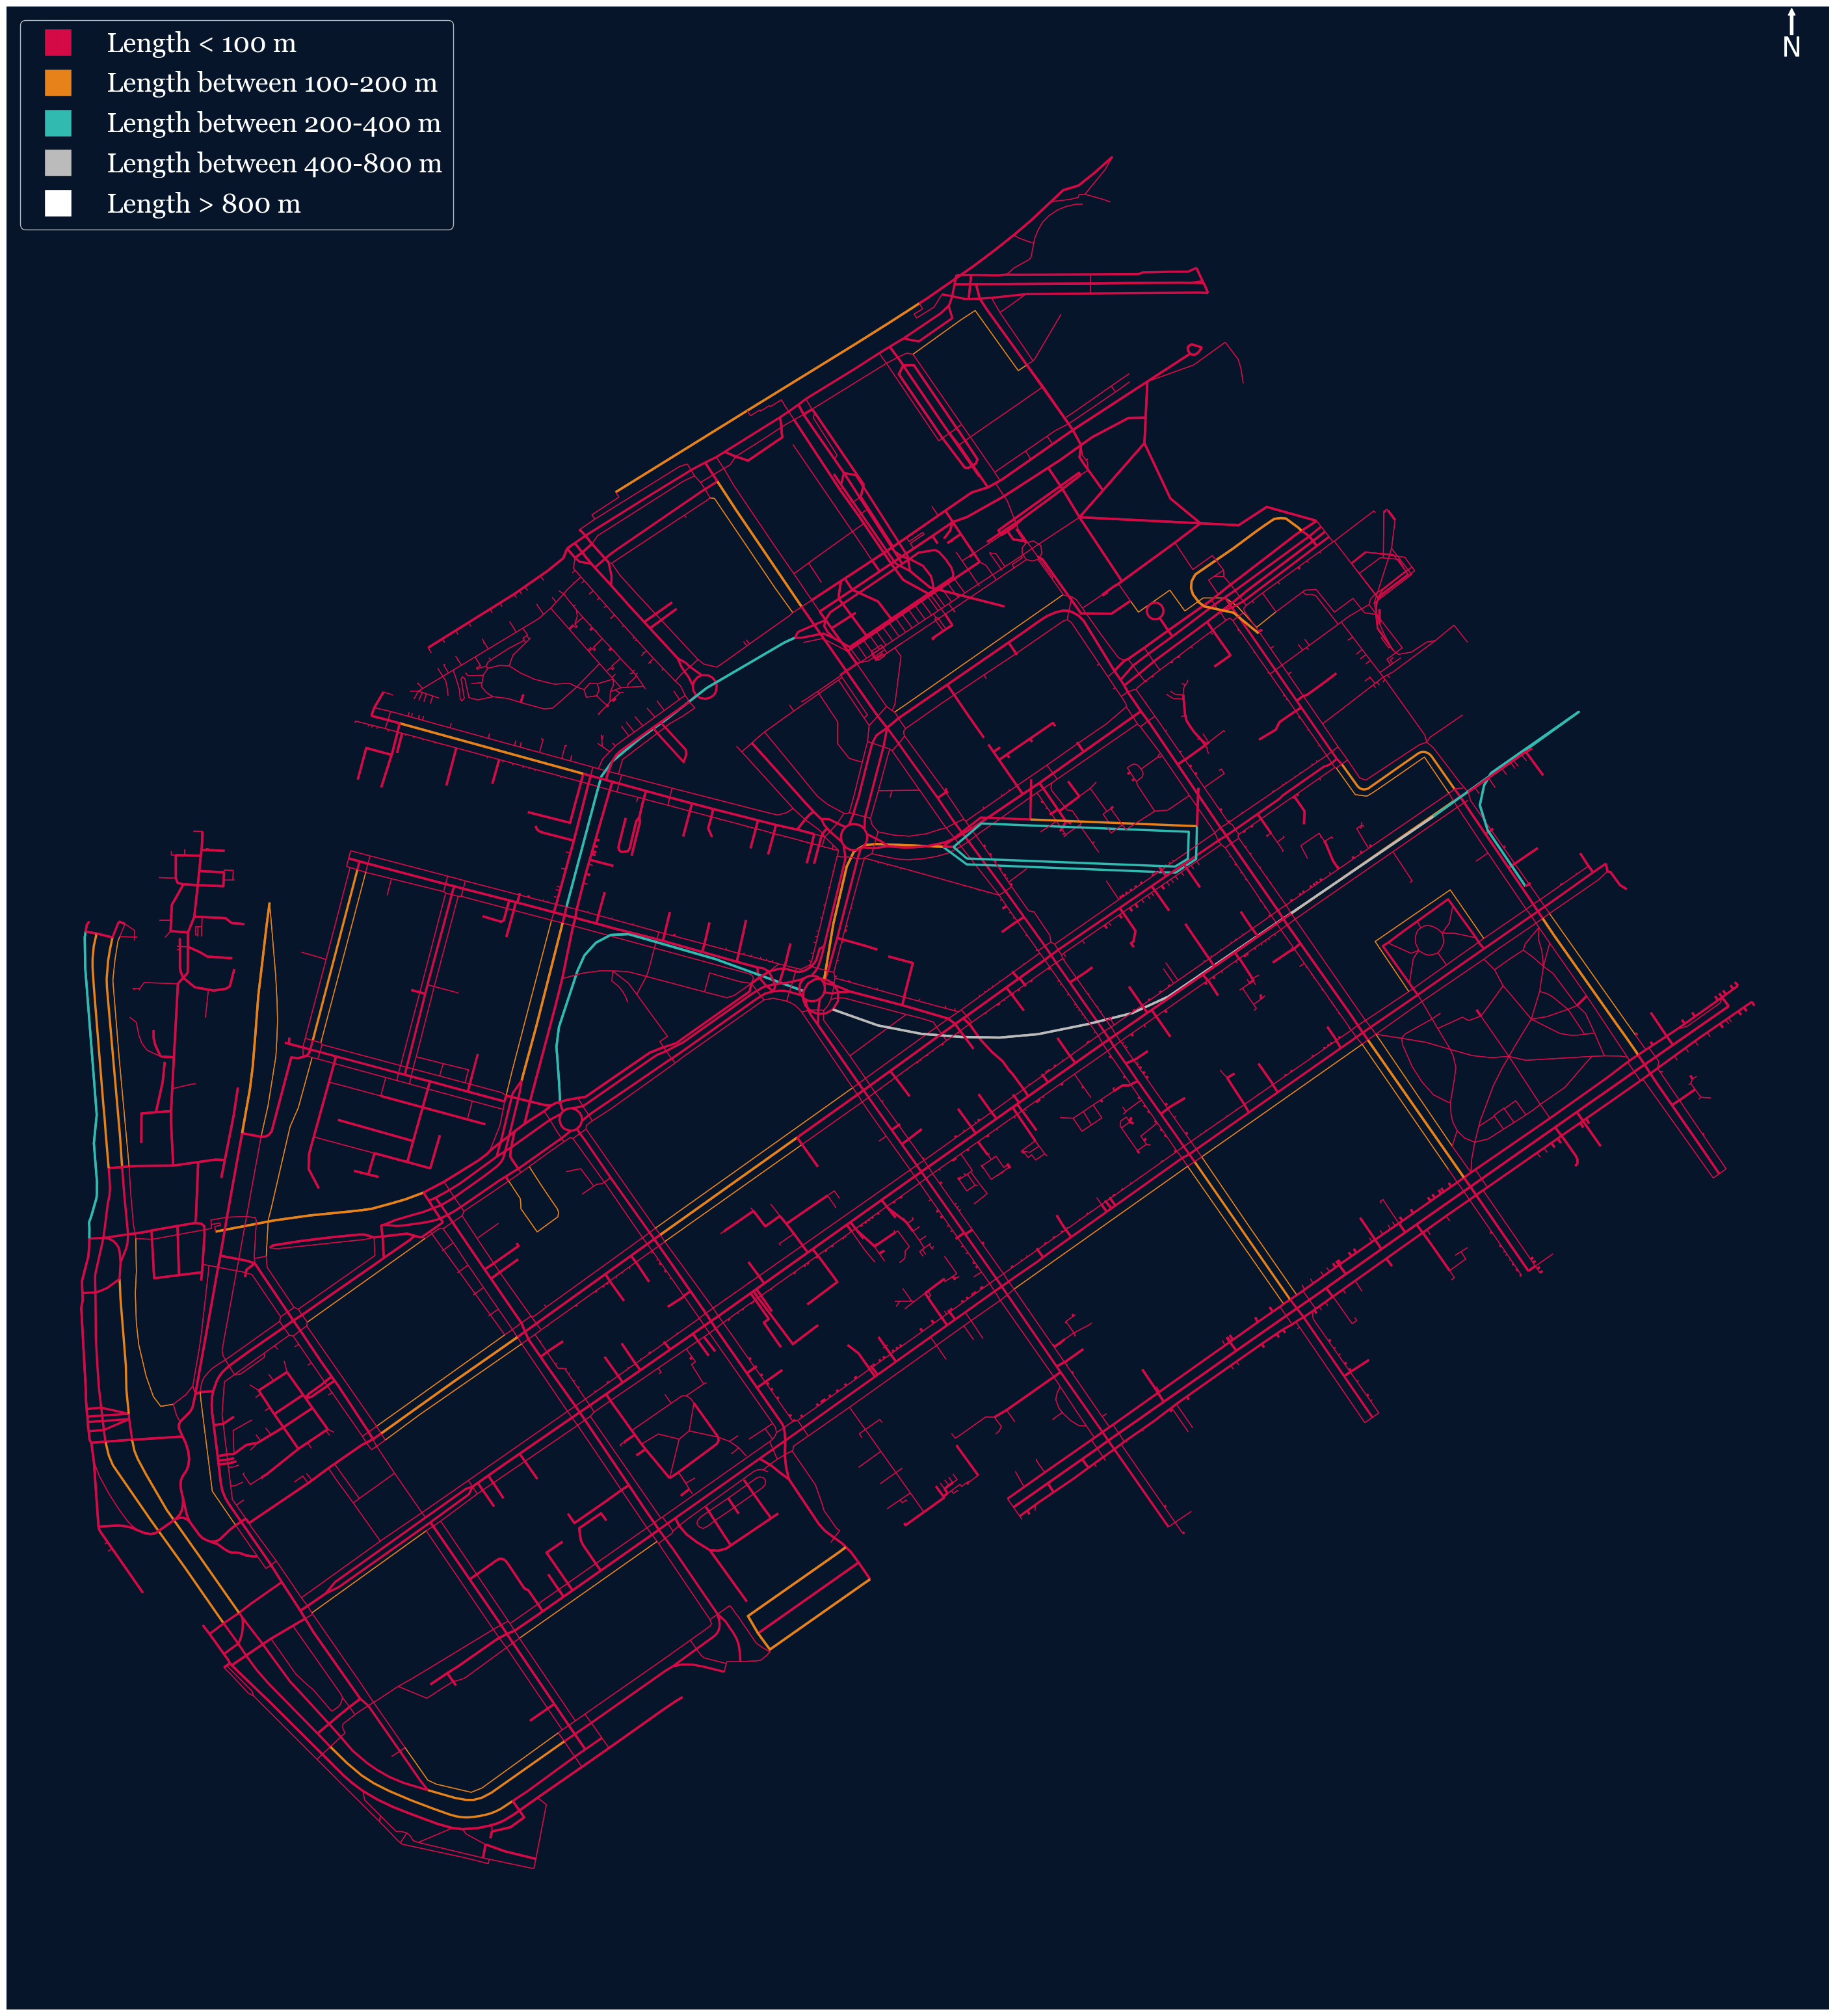

In [11]:
fig, ax = ox.plot_graph(
    G,
    ax=None,
    figsize=(40, 40),
    bgcolor="#061529",
    node_color='w',
    node_size=0,
    node_alpha=None,
    node_edgecolor='none',
    node_zorder=1,
    edge_color=roadColors,
    edge_linewidth=roadWidths,
    edge_alpha=None,
    show=False,
    close=False,
    save=False,
    filepath=None,
    dpi=300,
    bbox=(north+margin, south-margin, east+margin, west-margin)
)


# Text and marker size
markersize = 30
fontsize = 30

# Add legend
legend_elements = [Line2D([0], [0], marker='s', color="#061529", label= 'Length < 100 m',
                          markerfacecolor="#d40a47", markersize=markersize),
                          
                  Line2D([0], [0], marker='s', color="#061529", label= 'Length between 100-200 m',
                         markerfacecolor="#e78119", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Length between 200-400 m',
                         markerfacecolor="#30bab0", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Length between 400-800 m',
                         markerfacecolor="#bbbbbb", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Length > 800 m',
                  markerfacecolor="w", markersize=markersize)]    
                      
l = ax.legend(handles=legend_elements, frameon=True, ncol=1,
              facecolor = '#061529', framealpha = 0.9,
              loc='upper left',  fontsize = fontsize, prop={'family':"Georgia", 'size':fontsize})  
  
# Legend font color
for text in l.get_texts():
    text.set_color("w")
from matplotlib.patches import FancyArrowPatch
# Add north arrow
arrow_length = 0.0002  # Adjust the arrow length as needed
arrow = FancyArrowPatch((east + margin/2 , north + margin - arrow_length),
                        (east +margin/2, north + margin),
                        mutation_scale=15,
                        color='white')
ax.add_patch(arrow)

# Add north label
ax.text(east +margin/2, north + margin - 1.4 * arrow_length, 'N', color='white', fontsize=fontsize,
        va='center', ha='center')

# Save figure
fig.savefig("map.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)
#fig

Note that in placing our legend we can alternatively use the anchor parameter for a more precises control over the location of the legend on our map. In legend parameters, remove the loc and provide `bbox_to_anchor=(x, y)` instead. Note that you need to replace `x` and `y` with the desired value. 

The `x` and `y` values of the anchor in the `bbox_to_anchor` attribute specify the location of the legend's anchor point within the figure or axes coordinate system in Matplotlib. These values determine where the legend is placed relative to the figure or axes. The coordinate system's origin `(0, 0)` is at the bottom left, and `(1, 1)` is at the top right.

### Understanding `x` and `y` Values:

- **`x` Value**: Ranges from `0` to `1`, where `0` represents the left edge of the figure or axes, and `1` represents the right edge. A value of `0.5` would place the anchor point halfway across the width of the figure or axes.

- **`y` Value**: Similarly, ranges from `0` to `1`, where `0` is the bottom edge of the figure or axes, and `1` is the top edge. A value of `0.5` places the anchor point halfway up the height of the figure or axes.

### Examples:

- `bbox_to_anchor=(0, 0)`: Places the anchor point at the bottom left of the figure or axes.
- `bbox_to_anchor=(1, 1)`: Places the anchor point at the top right of the figure or axes.
- `bbox_to_anchor=(0.5, 0.5)`: Centers the anchor point within the figure or axes.
- `bbox_to_anchor=(0.18, 1.0)`: Positions the anchor point slightly to the right of the left edge (18% of the way across the width) and at the very top edge of the figure or axes.

### `bbox_to_anchor` with `loc` Parameter:

When combined with the `loc` parameter, `bbox_to_anchor` becomes even more powerful. The `loc` parameter specifies which part of the legend box the `bbox_to_anchor` refers to. For instance, if `loc='upper left'` and `bbox_to_anchor=(0.5, 0.5)`, the upper left corner of the legend box will be placed at the center of the figure or axes.

### Use Cases:

- **Outside the Axes**: To place the legend outside the axes, you might use values greater than `1` or less than `0`. For example, `bbox_to_anchor=(1.05, 1)` with `loc='upper left'` places the legend immediately to the right of the axes, aligned with the top.

- **Adjusting for Axes Size**: If the figure contains multiple subplots or customized axes, the exact placement using `bbox_to_anchor` might require tweaking the `x` and `y` values to achieve the desired legend location.

Remember, these coordinates should be adjusted to precisely position the legend in a location that is most suitable for your plot's layout and aesthetic requirements.

Let's play with this a bit before we move on to further cutomizing our map.

In [12]:
# Redraw the map and locate the legend using anchor parameter

## Image Processing in Python
One of the great advantages of creating maps with Python is the availability of numerous image processing libraries that allow cartographers to enhance their maps beyond basic visualizations. These enhancements can range from applying filters and effects to dynamically modifying map features, adding annotations, or even customizing the map's appearance to suit specific presentation needs. One such powerful library is Pillow, also known as the [Python Imaging Library (PIL) Fork](https://pillow.readthedocs.io/en/stable/).

<div style="border:1px solid black; padding:10px; margin:10px 0;">
<strong>About Pillow (PIL Fork):</strong> 

Pillow is an open-source Python Imaging Library that adds image processing capabilities to your Python interpreter. It allows for opening, manipulating, and saving many different image file formats and provides a wide array of image processing features. Pillow is easy to use for basic tasks yet powerful enough for complex image manipulation. It's an essential tool in the toolkit of anyone working with images in Python, including us cartographers, offering functions for image filtering, cropping, resizing, color manipulation, drawing, and much more.
</div>




### Improving our map image

Here we have a small demosntration of how Pillow can be used to add features to your map images. In this case, we will use Pillow to dynamically add a colored border to our already existing map image. This can be particularly useful for emphasizing certain aspects of the map, improving its aesthetic appeal, or preparing it for presentation or printing where specific margins are required.

In this example, the `add_border` function is used to add a significant (800 pixels wide) reddish border (`#e0474c`) to the bottom of a map image. This could serve various purposes, such as adding descriptive text, legends, or simply enhancing the map's visual appeal for display purposes. Remember that you can use the color tool provided above to explore color options and their code in hex format.

Here is what we are doing in the following cell:

1. **Color Conversion**: The `_color` function takes a color value in hex format and a color mode (e.g., "RGB") to return the color as a tuple compatible with Pillow operations. This is crucial for ensuring that the specified fill color for the border is correctly applied to the image.

2. **Image Expansion (Adding Borders)**: The `expand` function is designed to add extra space around an existing image, effectively creating a border. It allows specifying the width of the border on each side (`bottom`, `left`, `right`, `top`) and the color of the border (`fill`). This function is versatile, accommodating various border sizes and colors, making it suitable for customizing the map's framing.

3. **Applying the Border to a Map**: The `add_border` function streamlines the process of loading a map image, applying the expanded border via the `expand` function, and saving the modified map back to disk. This function highlights the practical application of the `expand` function, showing how easily a map (or any image in general) can be enhanced with a decorative or functional border.

Remmeber that PIL is only one of the existing Python image libraries which we can benefit from to further enhance our maps. Using such libraries, we can perform image manipulation tasks such as adding text overlays, borders, or other graphical elements to enhance the visual appeal of our maps.

In [13]:
# Get color
def _color(color, mode):
    color = ImageColor.getcolor(color, mode)
    return color

# Expand image
def expand(image, fill = '#e0474c', bottom = 50, left = None, right = None, top = None):
    """
    Expands image
    
    Parameters
    ----------    
    image: The image to expand.
    bottom, left, right, top: Border width, in pixels.
    param fill: Pixel fill value (a color value).  Default is 0 (black).   
    return: An image.
    """
    
    
    if left == None:
        left = 0
    if right == None:
        right = 0
    if top == None:
        top = 0
        
    width = left + image.size[0] + right
    height = top + image.size[1] + bottom
    out = Image.new(image.mode, (width, height), _color(fill, image.mode))
    out.paste(image, (left, top))
    return out

# Add border
def add_border(input_image, output_image, fill , bottom, left = None, right = None, top = None):
    """ Adds border to image and saves it.
    Parameters
    ----------         
    input_image: str,
        String object for the image you want to load. This is the name of the file you want to read.    
    output_image: str,
        String object for the output image name. This is the name of the file you want to export.    
    fill: str,
        Hex code for border color. Default is set to reddish.         
    bottom, left, right, top: int,
        Integer object specifying the border with in pixels.    
    """ 
    
    if left == None:
        left = 0
    if right == None:
        right = 0
    if top == None:
        top = 0
        
    img = Image.open(input_image)
    bimg = expand(img, bottom = bottom, left = left, right = right, top = top, fill= fill)
    bimg.save(output_image)

in_img = 'map.png'

# Output Image
add_border(in_img, output_image='map.png', fill = '#e0474c', bottom = 800)

Now we have created a new map with the border added at the bottom of the map frame. Now we will contninue our image processing by adding a text to this newly added border space. Additionally, we will resize our image to view it better here. The image we have created is very large which is great for printing or displaying on large screens. However, to show our map nicely on our computer's small screen and the course's website, we will resize it here. 

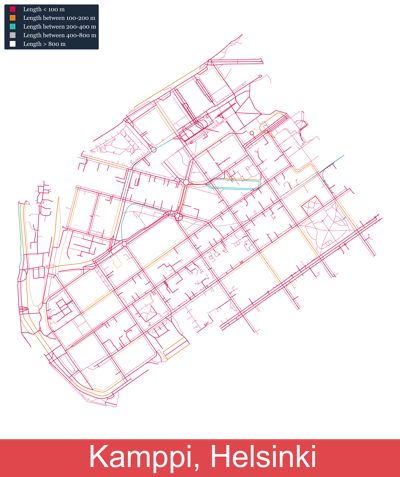

In [14]:
img = Image.open("map.png")
draw = ImageDraw.Draw(img)

# Get font from working directory. Visit https://www.wfonts.com/search?kwd=pmingliu to download fonts

font = ImageFont.truetype(font="arial.ttf", size=650)
# Add font: position, text, color, font
draw.text((1870,9300),"Kamppi, Helsinki", (255,255,255), font=font)

# Save image
img.save(MAP_DIRECTORY / f'{places[0]}.png')
# let's delete th old image file
os.remove("map.png")
# Resize the image maintaining aspect ratio based on width
new_width = 400
aspect_ratio = img.width / img.height
new_height = int(new_width / aspect_ratio)
img_resized = img.resize((new_width, new_height))
img_resized